In [44]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
import time
import joblib
from scipy.stats import norm
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import cv2
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [45]:
test_data = joblib.load('project2_models/test_data.pkl')

# Extract X_test and t_test from the loaded data
X_test = test_data['X_test']
t_test = test_data['t_test']

print("Test data loaded successfully")

Test data loaded successfully


In [32]:
model1_rf = joblib.load('project2_models/model1_rf.pkl')
model1_lr = joblib.load('project2_models/model1_lr.pkl')
model1_dt = joblib.load('project2_models/model1_dt.pkl')
model2_rf = joblib.load('project2_models/model2_rf.pkl')
model2_lr = joblib.load('project2_models/model2_lr.pkl')
model2_dt = joblib.load('project2_models/model2_dt.pkl')
model3_rf = joblib.load('project2_models/model3_rf.pkl')
model3_lr = joblib.load('project2_models/model3_lr.pkl')
model3_dt = joblib.load('project2_models/model3_dt.pkl')

In [33]:
def accuracy_confidence_interval(y_true, y_pred, confidence=0.95):
    accuracy = accuracy_score(y_true, y_pred)
    n = len(y_true)
    z = norm.ppf(1 - (1 - confidence) / 2)
    margin = z * np.sqrt((accuracy * (1 - accuracy)) / n)
    return accuracy - margin, accuracy + margin

In [34]:
print("Performance of Random forest classification with all features")
print("\n")
start = time.time()
y_test_rf = model1_rf.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy_rf = accuracy_score(t_test, y_test_rf)
f1_rf = f1_score(t_test, y_test_rf)
print("Accuracy on Test set:", accuracy_rf)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test_rf)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f1_rf)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test_rf))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test_rf ))

Performance of Random forest classification with all features


Testing time:  0.060098886489868164  ms
Accuracy on Test set: 0.96125
95% CI for Accuracy: (0.9478761290760935, 0.9746238709239066)
F1 Score on Test set: 0.9186351706036745

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       600
           1       0.97      0.88      0.92       200

    accuracy                           0.96       800
   macro avg       0.96      0.93      0.95       800
weighted avg       0.96      0.96      0.96       800


Confusion Matrix (Test):
 [[594   6]
 [ 25 175]]


In [35]:
print("Performance of Random forest classification with PCA")
print("\n")
start = time.time()
y_test2_rf = model2_rf.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy2_rf = accuracy_score(t_test, y_test2_rf)
f12_rf = f1_score(t_test, y_test2_rf)
print("Accuracy on Test set:", accuracy2_rf)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test2_rf)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f12_rf)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test2_rf))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test2_rf ))

Performance of Random forest classification with PCA


Testing time:  0.1440715789794922  ms
Accuracy on Test set: 0.96375
95% CI for Accuracy: (0.9507979265526425, 0.9767020734473575)
F1 Score on Test set: 0.9222520107238605

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       600
           1       0.99      0.86      0.92       200

    accuracy                           0.96       800
   macro avg       0.97      0.93      0.95       800
weighted avg       0.97      0.96      0.96       800


Confusion Matrix (Test):
 [[599   1]
 [ 28 172]]


In [36]:
print("Performance of Random forest classification with ISOMAP")
print("\n")
start = time.time()
y_test3_rf = model3_rf.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy3_rf = accuracy_score(t_test, y_test3_rf)
f13_rf = f1_score(t_test, y_test3_rf)
print("Accuracy on Test set:", accuracy3_rf)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test3_rf)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f13_rf)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test3_rf))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test3_rf ))

Performance of Random forest classification with ISOMAP


Testing time:  1.829484224319458  ms
Accuracy on Test set: 0.925
95% CI for Accuracy: (0.9067482464648717, 0.9432517535351284)
F1 Score on Test set: 0.844559585492228

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       600
           1       0.88      0.81      0.84       200

    accuracy                           0.93       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.93      0.92       800


Confusion Matrix (Test):
 [[577  23]
 [ 37 163]]


In [37]:
print("Performance of Logistic regression with all features")
print("\n")
start = time.time()
y_test_lr = model1_lr.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy_lr = accuracy_score(t_test, y_test_lr)
f1_lr = f1_score(t_test, y_test_lr)
print("Accuracy on Test set:", accuracy_lr)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test_lr)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f1_lr)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test_lr))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test_lr))

Performance of Logistic regression with all features


Testing time:  0.047661781311035156  ms
Accuracy on Test set: 0.9025
95% CI for Accuracy: (0.8819444543035385, 0.9230555456964614)
F1 Score on Test set: 0.8106796116504854

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       600
           1       0.79      0.83      0.81       200

    accuracy                           0.90       800
   macro avg       0.87      0.88      0.87       800
weighted avg       0.90      0.90      0.90       800


Confusion Matrix (Test):
 [[555  45]
 [ 33 167]]


In [38]:
print("Performance of Logistic regression with PCA")
print("\n")
start = time.time()
y_test2_lr = model2_lr.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy2_lr = accuracy_score(t_test, y_test2_lr)
f12_lr = f1_score(t_test, y_test2_lr)
print("Accuracy on Test set:", accuracy2_lr)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test2_lr)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f12_lr)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test2_lr))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test2_lr))

Performance of Logistic regression with PCA


Testing time:  0.14960408210754395  ms
Accuracy on Test set: 0.915
95% CI for Accuracy: (0.895674839593826, 0.9343251604061741)
F1 Score on Test set: 0.8256410256410256

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       600
           1       0.85      0.81      0.83       200

    accuracy                           0.92       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.91      0.92      0.91       800


Confusion Matrix (Test):
 [[571  29]
 [ 39 161]]


In [39]:
print("Performance of Logistic regression with ISOMAP")
print("\n")
start = time.time()
y_test3_lr = model3_lr.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy3_lr = accuracy_score(t_test, y_test3_lr)
f13_lr = f1_score(t_test, y_test3_lr)
print("Accuracy on Test set:", accuracy3_lr)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test3_lr)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f13_lr)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test3_lr))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test3_lr))

Performance of Logistic regression with ISOMAP


Testing time:  1.6284613609313965  ms
Accuracy on Test set: 0.91375
95% CI for Accuracy: (0.8942965629313689, 0.933203437068631)
F1 Score on Test set: 0.8169761273209549

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       600
           1       0.87      0.77      0.82       200

    accuracy                           0.91       800
   macro avg       0.90      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800


Confusion Matrix (Test):
 [[577  23]
 [ 46 154]]


In [40]:
print("Performance of Decision Tree with all features")
print("\n")
start = time.time()
y_test1_dt = model1_dt.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy1_dt = accuracy_score(t_test, y_test1_dt)
f11_dt = f1_score(t_test, y_test1_dt)
print("Accuracy on Test set:", accuracy1_dt)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test1_dt)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f11_dt)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test1_dt))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test1_dt))

Performance of Decision Tree with all features


Testing time:  0.050273895263671875  ms
Accuracy on Test set: 0.91375
95% CI for Accuracy: (0.8942965629313689, 0.933203437068631)
F1 Score on Test set: 0.8296296296296296

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       600
           1       0.82      0.84      0.83       200

    accuracy                           0.91       800
   macro avg       0.88      0.89      0.89       800
weighted avg       0.91      0.91      0.91       800


Confusion Matrix (Test):
 [[563  37]
 [ 32 168]]


In [41]:
print("Performance of Decision Tree with PCA")
print("\n")
start = time.time()
y_test2_dt = model2_dt.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy2_dt = accuracy_score(t_test, y_test2_dt)
f12_dt = f1_score(t_test, y_test2_dt)
print("Accuracy on Test set:", accuracy2_dt)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test2_dt)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f12_dt)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test2_dt))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test2_dt))

Performance of Decision Tree with PCA


Testing time:  0.13268542289733887  ms
Accuracy on Test set: 0.90875
95% CI for Accuracy: (0.8887954588368131, 0.9287045411631868)
F1 Score on Test set: 0.8223844282238443

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       600
           1       0.80      0.84      0.82       200

    accuracy                           0.91       800
   macro avg       0.87      0.89      0.88       800
weighted avg       0.91      0.91      0.91       800


Confusion Matrix (Test):
 [[558  42]
 [ 31 169]]


In [42]:
print("Performance of Decision Tree with ISOMAP")
print("\n")
start = time.time()
y_test3_dt = model3_dt.predict(X_test)
end = time.time()
print('Testing time: ', end-start, ' ms')
accuracy3_dt = accuracy_score(t_test, y_test3_dt)
f13_dt = f1_score(t_test, y_test3_dt)
print("Accuracy on Test set:", accuracy3_dt)
test_ci_low1, test_ci_high1 = accuracy_confidence_interval(t_test, y_test3_dt)
print("95% CI for Accuracy:", (test_ci_low1, test_ci_high1))
print("F1 Score on Test set:", f11_dt)
print("\nClassification Report on Testing set:\n", classification_report(t_test, y_test3_dt))
print("\nConfusion Matrix (Test):\n", confusion_matrix(t_test, y_test3_dt))

Performance of Decision Tree with ISOMAP


Testing time:  1.6379680633544922  ms
Accuracy on Test set: 0.89375
95% CI for Accuracy: (0.8723961791773476, 0.9151038208226525)
F1 Score on Test set: 0.8296296296296296

Classification Report on Testing set:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       600
           1       0.83      0.72      0.77       200

    accuracy                           0.89       800
   macro avg       0.87      0.84      0.85       800
weighted avg       0.89      0.89      0.89       800


Confusion Matrix (Test):
 [[570  30]
 [ 55 145]]


1. Based on all the performance metrics and training and testing times, it is observed that random forest classifier overfits the training data whereas logistic regression and decision tree has training accuracy around 90 percent indicating better generalization performance. 
2. The training time is low for logistic regression with PCA without much impact on the performance in training and test set as well. So , we can consider 'model2_lr' which is Logistic Regression with ISOMAP to be the best available model.

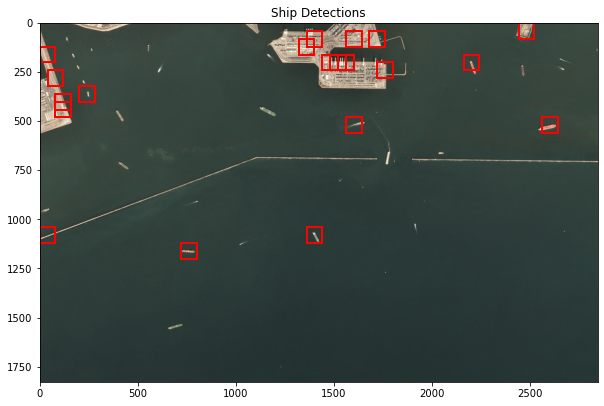

In [43]:
def preprocess_patch(patch):
    patch = cv2.resize(patch, (80, 80))  # Resize to match training patch size
    if patch.shape[-1] != 3:
        patch = cv2.cvtColor(patch, cv2.COLOR_GRAY2RGB)
    patch = patch.flatten().reshape(1, -1)  # Flatten and reshape for the model
    return patch

# Function to classify patches and mark ships
def detect_ships(image_path, model, patch_size=80, step=40):
    # Load and prepare image
    image = Image.open(image_path)
    image_np = np.array(image)
    
    # Dimensions
    h, w, _ = image_np.shape
    detected_ships = []

    # Slide over the image with patches
    for y in range(0, h - patch_size + 1, step):
        for x in range(0, w - patch_size + 1, step):
            patch = image_np[y:y + patch_size, x:x + patch_size]
            patch_processed = preprocess_patch(patch)
            
            # Predict using the model
            prediction = model.predict(patch_processed)
           # print(f"Prediction at ({x}, {y}): {prediction}")  # Print prediction for debugging
            # If prediction is "ship" (assuming label 1 for ship)
            if prediction == 1:
                detected_ships.append((x, y, patch_size, patch_size))

    # Visualize the result
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image)
    
    # Draw rectangles on detected ships
    for (x, y, w, h) in detected_ships:
        rect = plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2)
        ax.add_patch(rect)

    plt.title("Ship Detections")
    #plt.axis("off")
    plt.show()

# Run the detection function
detect_ships("ships_dataset/scenes/lb_2.png", model2_lr)